In [ ]:
import pandas as pd
Titanic = pd.read_csv("Titanic.csv")

In [ ]:
Titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Dataset is slightly imbalanced
1. 0 - Not survived
2. 1 - Survived

In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Titanic["Name"].value_counts()

Carter, Miss. Lucile Polk                                            1
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)              1
Wick, Mrs. George Dennick (Mary Hitchcock)                           1
Hakkarainen, Mr. Pekka Pietari                                       1
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")    1
                                                                    ..
Ling, Mr. Lee                                                        1
Mineff, Mr. Ivan                                                     1
Daly, Mr. Peter Denis                                                1
Long, Mr. Milton Clyde                                               1
Andreasson, Mr. Paul Edvin                                           1
Name: Name, Length: 891, dtype: int64

From above, series we can see that Name attribute is unique for all passengers, so it will not contribute much towards classifcation task, so we are dropping it

In [ ]:
Titanic = Titanic.drop(labels=["Name","PassengerId"],axis=1)

3 columns having NUll value - one numerical and 2 categorical
- Age
- Cabin
- Embarked

### Approach 1 - Filling missing value with 0 (Not handling missing value)

In [ ]:
Titanic_fill0 = Titanic

In [ ]:
Titanic_fill0["Age"] = Titanic_fill0["Age"].fillna(0)

In [ ]:
Titanic_fill0["Cabin"] = Titanic_fill0["Cabin"].fillna(value="None")
Titanic_fill0["Embarked"] = Titanic_fill0["Embarked"].fillna(value="None")

In [ ]:
X = Titanic_fill0.drop(columns = "Survived",axis=1)
y = Titanic_fill0["Survived"]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,None,S
887,1,female,19.0,0,0,112053,30.0000,B42,S
888,3,female,0.0,1,2,W./C. 6607,23.4500,None,S
889,1,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y)

Feature vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Categorical variable 
- Sex
- Ticket
- Cabin
- Embarked

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Sex'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sex = vectorizer.transform(X_train['Sex'].values)
X_test_sex = vectorizer.transform(X_test['Sex'].values)

In [ ]:
vectorizer.fit(X_train['Ticket'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Ticket = vectorizer.transform(X_train['Ticket'].values)
X_test_Ticket = vectorizer.transform(X_test['Ticket'].values)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Embarked'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Embarked = vectorizer.transform(X_train['Embarked'].values)
X_test_Embarked = vectorizer.transform(X_test['Embarked'].values)

In [ ]:
X_train["Cabin"].value_counts()

None           541
G6               4
D                3
F2               3
C23 C25 C27      3
              ... 
C103             1
B58 B60          1
C91              1
C111             1
C93              1
Name: Cabin, Length: 130, dtype: int64

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Cabin'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Cabin = vectorizer.transform(X_train['Cabin'].values)
X_test_Cabin = vectorizer.transform(X_test['Cabin'].values)

Numerical features

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['Pclass'].values.reshape(1,-1))
X_train_Pclass_norm = normalizer.transform(X_train['Pclass'].values.reshape(1,-1))
X_test_Pclass_norm = normalizer.transform(X_test['Pclass'].values.reshape(1,-1))

normalizer.fit(X_train['Age'].values.reshape(1,-1))
X_train_Age_norm = normalizer.transform(X_train['Age'].values.reshape(1,-1))
X_test_Age_norm = normalizer.transform(X_test['Age'].values.reshape(1,-1))

normalizer.fit(X_train['SibSp'].values.reshape(1,-1))
X_train_SibSp_norm = normalizer.transform(X_train['SibSp'].values.reshape(1,-1))
X_test_SibSp_norm = normalizer.transform(X_test['SibSp'].values.reshape(1,-1))

normalizer.fit(X_train['Parch'].values.reshape(1,-1))
X_train_Parch_norm = normalizer.transform(X_train['Parch'].values.reshape(1,-1))
X_test_Parch_norm = normalizer.transform(X_test['Parch'].values.reshape(1,-1))

normalizer.fit(X_train['Fare'].values.reshape(1,-1))
X_train_Fare_norm = normalizer.transform(X_train['Fare'].values.reshape(1,-1))
X_test_Fare_norm = normalizer.transform(X_test['Fare'].values.reshape(1,-1))




In [ ]:
X_train_Pclass_norm = X_train_Pclass_norm.T
X_test_Pclass_norm = X_test_Pclass_norm.T

X_train_Age_norm = X_train_Age_norm.T
X_test_Age_norm = X_test_Age_norm.T

X_train_Fare_norm = X_train_Fare_norm.T
X_test_Fare_norm = X_test_Fare_norm.T

X_train_Parch_norm = X_train_Parch_norm.T
X_test_Parch_norm = X_test_Parch_norm.T

X_train_SibSp_norm = X_train_SibSp_norm.T
X_test_SibSp_norm = X_test_SibSp_norm.T

In [ ]:
print(X_train_SibSp_norm.shape)

(712, 1)


Creating featurized X_Train and X_Test

In [ ]:
from scipy.sparse import hstack
X_tr = hstack((X_train_sex,X_train_Ticket,X_train_Embarked,X_train_Cabin,X_train_Pclass_norm,X_train_Age_norm,X_train_Fare_norm,X_train_Parch_norm,X_train_SibSp_norm)).tocsr()
X_te = hstack((X_test_sex,X_test_Ticket,X_test_Embarked,X_test_Cabin,X_test_Pclass_norm,X_test_Age_norm,X_test_Fare_norm,X_test_Parch_norm,X_test_SibSp_norm)).tocsr()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_tr,y_train)
y_pred = clf.predict(X_te)
print("The accuracy of the model is {}".format(accuracy_score(y_test,y_pred)))

The accuracy of the model is 0.7039106145251397


## Approach 2- Dropping missing value

In [ ]:
Titanic_drop = Titanic
Titanic_drop = Titanic_drop.dropna()

In [ ]:
Titanic_drop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


By this approach we have only 183 rows data is remaining

In [ ]:
X = Titanic_drop.drop(columns = "Survived",axis=1)
y = Titanic_drop["Survived"]

In [ ]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y)

Feature vectorization

Categorical variable 
- Sex
- Ticket
- Cabin
- Embarked

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Sex'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sex = vectorizer.transform(X_train['Sex'].values)
X_test_sex = vectorizer.transform(X_test['Sex'].values)

In [ ]:
vectorizer.fit(X_train['Ticket'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Ticket = vectorizer.transform(X_train['Ticket'].values)
X_test_Ticket = vectorizer.transform(X_test['Ticket'].values)

In [ ]:
X_train['Embarked'].value_counts()

S    95
C    49
Q     2
Name: Embarked, dtype: int64

In [ ]:
X_test['Embarked'].value_counts()

S    21
C    16
Name: Embarked, dtype: int64

In [ ]:
X_train['Embarked'] = X_train['Embarked'].replace({"S":"Southampton","C":"Cherbourg", "Q":"Queenstown"})
X_test['Embarked'] = X_test['Embarked'].replace({"S":"Southampton","C":"Cherbourg", "Q":"Queenstown"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
vectorizer = CountVectorizer(stop_words="english",analyzer="word")
vectorizer.fit(X_train['Embarked'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Embarked = vectorizer.transform(X_train['Embarked'].values)
X_test_Embarked = vectorizer.transform(X_test['Embarked'].values)

In [ ]:
X_train["Cabin"].value_counts()

None           541
G6               4
D                3
F2               3
C23 C25 C27      3
              ... 
C103             1
B58 B60          1
C91              1
C111             1
C93              1
Name: Cabin, Length: 130, dtype: int64

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Cabin'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Cabin = vectorizer.transform(X_train['Cabin'].values)
X_test_Cabin = vectorizer.transform(X_test['Cabin'].values)

Numerical features

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['Pclass'].values.reshape(1,-1))
X_train_Pclass_norm = normalizer.transform(X_train['Pclass'].values.reshape(1,-1))
X_test_Pclass_norm = normalizer.transform(X_test['Pclass'].values.reshape(1,-1))

normalizer.fit(X_train['Age'].values.reshape(1,-1))
X_train_Age_norm = normalizer.transform(X_train['Age'].values.reshape(1,-1))
X_test_Age_norm = normalizer.transform(X_test['Age'].values.reshape(1,-1))

normalizer.fit(X_train['SibSp'].values.reshape(1,-1))
X_train_SibSp_norm = normalizer.transform(X_train['SibSp'].values.reshape(1,-1))
X_test_SibSp_norm = normalizer.transform(X_test['SibSp'].values.reshape(1,-1))

normalizer.fit(X_train['Parch'].values.reshape(1,-1))
X_train_Parch_norm = normalizer.transform(X_train['Parch'].values.reshape(1,-1))
X_test_Parch_norm = normalizer.transform(X_test['Parch'].values.reshape(1,-1))

normalizer.fit(X_train['Fare'].values.reshape(1,-1))
X_train_Fare_norm = normalizer.transform(X_train['Fare'].values.reshape(1,-1))
X_test_Fare_norm = normalizer.transform(X_test['Fare'].values.reshape(1,-1))




In [ ]:
X_train_Pclass_norm = X_train_Pclass_norm.T
X_test_Pclass_norm = X_test_Pclass_norm.T

X_train_Age_norm = X_train_Age_norm.T
X_test_Age_norm = X_test_Age_norm.T

X_train_Fare_norm = X_train_Fare_norm.T
X_test_Fare_norm = X_test_Fare_norm.T

X_train_Parch_norm = X_train_Parch_norm.T
X_test_Parch_norm = X_test_Parch_norm.T

X_train_SibSp_norm = X_train_SibSp_norm.T
X_test_SibSp_norm = X_test_SibSp_norm.T

In [ ]:
print(X_train_SibSp_norm.shape)

(146, 1)


Creating featurized X_Train and X_Test

In [ ]:
from scipy.sparse import hstack
X_tr = hstack((X_train_sex,X_train_Ticket,X_train_Embarked,X_train_Cabin,X_train_Pclass_norm,X_train_Age_norm,X_train_Fare_norm,X_train_Parch_norm,X_train_SibSp_norm)).tocsr()
X_te = hstack((X_test_sex,X_test_Ticket,X_test_Embarked,X_test_Cabin,X_test_Pclass_norm,X_test_Age_norm,X_test_Fare_norm,X_test_Parch_norm,X_test_SibSp_norm)).tocsr()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_tr,y_train)
y_pred = clf.predict(X_te)
print("The accuracy of the model is {}".format(accuracy_score(y_test,y_pred)))

The accuracy of the model is 0.6486486486486487


## Approach 3 - Filling missing value with central tendency  - mean,median and mode

In [ ]:
Titanic_cd = Titanic

In [ ]:
Titanic_cd

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


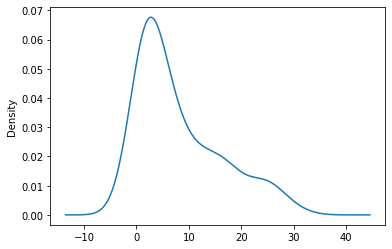

In [ ]:
Titanic_cd["Age"].value_counts().plot(kind="kde")

As we can see that pdf of age is right skewed, we will use median value to fill missing value

In [ ]:
Age_median = np.median(list(dict(Titanic_cd["Age"].value_counts()).keys()))

In [ ]:
Titanic_cd["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
Embarked_mode = "S"

In [ ]:
Titanic_cd["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F33            3
              ..
E68            1
D48            1
D49            1
C91            1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
Cabin_mode = "C23 C25 C27"

In [ ]:
Titanic_cd["Age"] = Titanic_cd["Age"].fillna(Age_median)
Titanic_cd["Cabin"] = Titanic_cd["Cabin"].fillna(Cabin_mode)
Titanic_cd["Embarked"] = Titanic_cd["Embarked"].fillna(Embarked_mode)

In [ ]:
Titanic_cd

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.00,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,1,1,female,38.00,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,1,1,female,35.00,1,0,113803,53.1000,C123,S
4,0,3,male,35.00,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,211536,13.0000,C23 C25 C27,S
887,1,1,female,19.00,0,0,112053,30.0000,B42,S
888,0,3,female,32.75,1,2,W./C. 6607,23.4500,C23 C25 C27,S
889,1,1,male,26.00,0,0,111369,30.0000,C148,C


In [ ]:
X = Titanic_cd.drop(columns = "Survived",axis=1)
y = Titanic_cd["Survived"]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.00,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,1,female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,female,26.00,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,1,female,35.00,1,0,113803,53.1000,C123,S
4,3,male,35.00,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.00,0,0,211536,13.0000,C23 C25 C27,S
887,1,female,19.00,0,0,112053,30.0000,B42,S
888,3,female,32.75,1,2,W./C. 6607,23.4500,C23 C25 C27,S
889,1,male,26.00,0,0,111369,30.0000,C148,C


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y)

Feature vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Categorical variable 
- Sex
- Ticket
- Cabin
- Embarked

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Sex'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sex = vectorizer.transform(X_train['Sex'].values)
X_test_sex = vectorizer.transform(X_test['Sex'].values)

In [ ]:
vectorizer.fit(X_train['Ticket'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Ticket = vectorizer.transform(X_train['Ticket'].values)
X_test_Ticket = vectorizer.transform(X_test['Ticket'].values)

In [ ]:
X_train['Embarked'].value_counts()

S    521
C    128
Q     63
Name: Embarked, dtype: int64

In [ ]:
X_train['Embarked'] = X_train['Embarked'].replace({"S":"Southampton","C":"Cherbourg", "Q":"Queenstown"})
X_test['Embarked'] = X_test['Embarked'].replace({"S":"Southampton","C":"Cherbourg", "Q":"Queenstown"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Embarked'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Embarked = vectorizer.transform(X_train['Embarked'].values)
X_test_Embarked = vectorizer.transform(X_test['Embarked'].values)

In [ ]:
X_train["Cabin"].value_counts()

None           541
G6               4
D                3
F2               3
C23 C25 C27      3
              ... 
C103             1
B58 B60          1
C91              1
C111             1
C93              1
Name: Cabin, Length: 130, dtype: int64

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Cabin'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Cabin = vectorizer.transform(X_train['Cabin'].values)
X_test_Cabin = vectorizer.transform(X_test['Cabin'].values)

Numerical features

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['Pclass'].values.reshape(1,-1))
X_train_Pclass_norm = normalizer.transform(X_train['Pclass'].values.reshape(1,-1))
X_test_Pclass_norm = normalizer.transform(X_test['Pclass'].values.reshape(1,-1))

normalizer.fit(X_train['Age'].values.reshape(1,-1))
X_train_Age_norm = normalizer.transform(X_train['Age'].values.reshape(1,-1))
X_test_Age_norm = normalizer.transform(X_test['Age'].values.reshape(1,-1))

normalizer.fit(X_train['SibSp'].values.reshape(1,-1))
X_train_SibSp_norm = normalizer.transform(X_train['SibSp'].values.reshape(1,-1))
X_test_SibSp_norm = normalizer.transform(X_test['SibSp'].values.reshape(1,-1))

normalizer.fit(X_train['Parch'].values.reshape(1,-1))
X_train_Parch_norm = normalizer.transform(X_train['Parch'].values.reshape(1,-1))
X_test_Parch_norm = normalizer.transform(X_test['Parch'].values.reshape(1,-1))

normalizer.fit(X_train['Fare'].values.reshape(1,-1))
X_train_Fare_norm = normalizer.transform(X_train['Fare'].values.reshape(1,-1))
X_test_Fare_norm = normalizer.transform(X_test['Fare'].values.reshape(1,-1))




In [ ]:
X_train_Pclass_norm = X_train_Pclass_norm.T
X_test_Pclass_norm = X_test_Pclass_norm.T

X_train_Age_norm = X_train_Age_norm.T
X_test_Age_norm = X_test_Age_norm.T

X_train_Fare_norm = X_train_Fare_norm.T
X_test_Fare_norm = X_test_Fare_norm.T

X_train_Parch_norm = X_train_Parch_norm.T
X_test_Parch_norm = X_test_Parch_norm.T

X_train_SibSp_norm = X_train_SibSp_norm.T
X_test_SibSp_norm = X_test_SibSp_norm.T

In [ ]:
print(X_train_SibSp_norm.shape)

(712, 1)


Creating featurized X_Train and X_Test

In [ ]:
from scipy.sparse import hstack
X_tr = hstack((X_train_sex,X_train_Ticket,X_train_Embarked,X_train_Cabin,X_train_Pclass_norm,X_train_Age_norm,X_train_Fare_norm,X_train_Parch_norm,X_train_SibSp_norm)).tocsr()
X_te = hstack((X_test_sex,X_test_Ticket,X_test_Embarked,X_test_Cabin,X_test_Pclass_norm,X_test_Age_norm,X_test_Fare_norm,X_test_Parch_norm,X_test_SibSp_norm)).tocsr()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_tr,y_train)
y_pred = clf.predict(X_te)
print("The accuracy of the model is {}".format(accuracy_score(y_test,y_pred)))

The accuracy of the model is 0.7988826815642458


## Approach 4 - Getting missing value of Age column from regression and imptuating categorical variable with mode

In [ ]:
Titanic_reg = Titanic

In [ ]:
Titanic_reg

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Titanic_reg["Age"].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [ ]:
Titanic_reg_temp = Titanic_reg
Titanic_reg_temp["Sex"] = Titanic_reg_temp["Sex"].map({'male': 1, 'female': 0})
Titanic_reg_temp["Embarked"] = Titanic_reg_temp["Embarked"].fillna('S')
Titanic_reg_temp["Embarked"] = Titanic_reg_temp["Embarked"].map({'S': 1, 'C': 2, 'Q': 3})

In [ ]:
print(Titanic_reg_temp.corr()["Age"])

Survived   -0.077221
Pclass     -0.369226
Sex         0.093254
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Embarked    0.010171
Name: Age, dtype: float64


Age column have high correlation with Pclass,Sibsp,Parch and with other columns it is neglible. so we will use only those 3 column in our imputation model

In [ ]:
cols = ["Pclass", "SibSp", "Parch", "Age"]
df = Titanic_reg_temp[cols]
test_df = df[df["Age"].isnull()]
df = df.dropna()

In [ ]:
y_train = df["Age"]
X_train = df.drop("Age", axis=1)
X_test = test_df.drop("Age", axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
Titanic_reg.loc[Titanic_reg.Age.isnull(), 'Age'] = y_pred

In [ ]:
Titanic_reg["Cabin"] = Titanic_cd["Cabin"].fillna(Cabin_mode)
Titanic_reg["Embarked"] = Titanic_cd["Embarked"].fillna("S")

In [ ]:
Titanic_reg

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,1
1,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,2
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,1
3,1,1,0,35.000000,1,0,113803,53.1000,C123,1
4,0,3,1,35.000000,0,0,373450,8.0500,C23 C25 C27,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,C23 C25 C27,1
887,1,1,0,19.000000,0,0,112053,30.0000,B42,1
888,0,3,0,20.924109,1,2,W./C. 6607,23.4500,C23 C25 C27,1
889,1,1,1,26.000000,0,0,111369,30.0000,C148,2


In [ ]:
X = Titanic_reg.drop(columns = "Survived",axis=1)
y = Titanic_reg["Survived"]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,1
1,1,0,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,1
3,1,0,35.000000,1,0,113803,53.1000,C123,1
4,3,1,35.000000,0,0,373450,8.0500,C23 C25 C27,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,211536,13.0000,C23 C25 C27,1
887,1,0,19.000000,0,0,112053,30.0000,B42,1
888,3,0,20.924109,1,2,W./C. 6607,23.4500,C23 C25 C27,1
889,1,1,26.000000,0,0,111369,30.0000,C148,2


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y)

Feature vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Categorical variable 
- Sex
- Ticket
- Cabin
- Embarked

In [ ]:
X_train['Sex'] = X_train['Sex'].replace({0:"Male",1:"Female"})
X_test['Sex'] = X_test['Sex'].replace({0:"Male",1:"Female"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Sex'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sex = vectorizer.transform(X_train['Sex'].values)
X_test_sex = vectorizer.transform(X_test['Sex'].values)

In [ ]:
vectorizer.fit(X_train['Ticket'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Ticket = vectorizer.transform(X_train['Ticket'].values)
X_test_Ticket = vectorizer.transform(X_test['Ticket'].values)

In [ ]:
X_train['Embarked'].value_counts()

1    519
2    140
3     53
Name: Embarked, dtype: int64

In [ ]:
X_train['Embarked'] = X_train['Embarked'].replace({1:"Southampton",2:"Cherbourg", 3:"Queenstown"})
X_test['Embarked'] = X_test['Embarked'].replace({1:"Southampton",2:"Cherbourg", 3:"Queenstown"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Embarked'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Embarked = vectorizer.transform(X_train['Embarked'].values)
X_test_Embarked = vectorizer.transform(X_test['Embarked'].values)

In [ ]:
X_train["Cabin"].value_counts()

C23 C25 C27    547
F2               3
C22 C26          3
G6               3
F33              3
              ... 
C123             1
B78              1
F G63            1
D48              1
B19              1
Name: Cabin, Length: 124, dtype: int64

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Cabin'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Cabin = vectorizer.transform(X_train['Cabin'].values)
X_test_Cabin = vectorizer.transform(X_test['Cabin'].values)

Numerical features

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['Pclass'].values.reshape(1,-1))
X_train_Pclass_norm = normalizer.transform(X_train['Pclass'].values.reshape(1,-1))
X_test_Pclass_norm = normalizer.transform(X_test['Pclass'].values.reshape(1,-1))

normalizer.fit(X_train['Age'].values.reshape(1,-1))
X_train_Age_norm = normalizer.transform(X_train['Age'].values.reshape(1,-1))
X_test_Age_norm = normalizer.transform(X_test['Age'].values.reshape(1,-1))

normalizer.fit(X_train['SibSp'].values.reshape(1,-1))
X_train_SibSp_norm = normalizer.transform(X_train['SibSp'].values.reshape(1,-1))
X_test_SibSp_norm = normalizer.transform(X_test['SibSp'].values.reshape(1,-1))

normalizer.fit(X_train['Parch'].values.reshape(1,-1))
X_train_Parch_norm = normalizer.transform(X_train['Parch'].values.reshape(1,-1))
X_test_Parch_norm = normalizer.transform(X_test['Parch'].values.reshape(1,-1))

normalizer.fit(X_train['Fare'].values.reshape(1,-1))
X_train_Fare_norm = normalizer.transform(X_train['Fare'].values.reshape(1,-1))
X_test_Fare_norm = normalizer.transform(X_test['Fare'].values.reshape(1,-1))




In [ ]:
X_train_Pclass_norm = X_train_Pclass_norm.T
X_test_Pclass_norm = X_test_Pclass_norm.T

X_train_Age_norm = X_train_Age_norm.T
X_test_Age_norm = X_test_Age_norm.T

X_train_Fare_norm = X_train_Fare_norm.T
X_test_Fare_norm = X_test_Fare_norm.T

X_train_Parch_norm = X_train_Parch_norm.T
X_test_Parch_norm = X_test_Parch_norm.T

X_train_SibSp_norm = X_train_SibSp_norm.T
X_test_SibSp_norm = X_test_SibSp_norm.T

In [ ]:
print(X_train_SibSp_norm.shape)

(712, 1)


Creating featurized X_Train and X_Test

In [ ]:
from scipy.sparse import hstack
X_tr = hstack((X_train_sex,X_train_Ticket,X_train_Embarked,X_train_Cabin,X_train_Pclass_norm,X_train_Age_norm,X_train_Fare_norm,X_train_Parch_norm,X_train_SibSp_norm)).tocsr()
X_te = hstack((X_test_sex,X_test_Ticket,X_test_Embarked,X_test_Cabin,X_test_Pclass_norm,X_test_Age_norm,X_test_Fare_norm,X_test_Parch_norm,X_test_SibSp_norm)).tocsr()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_tr,y_train)
y_pred = clf.predict(X_te)
print("The accuracy of the model is {}".format(accuracy_score(y_test,y_pred)))

The accuracy of the model is 0.8379888268156425


### Observation:- 

Approach - Accuracy

1. Filling missing value with 0 - 70.39
2. Dropping missing value - 64.86
3. Filling missing value with central tendency - 79.88
4. Filling missing value by predicting from linear reg - 83.79